In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,precision_score

In [2]:
data = pd.read_csv(r"D:\Intellipaat\lms assignments\datasets\Data-sets (1)\census-income (7).csv",skipinitialspace=True)
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Unnamed: 14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  Unnamed: 14     32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
# checking and removing duplicates 
data.duplicated().sum()
data.drop_duplicates(inplace=True)

In [5]:
data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Unnamed: 14       0
dtype: int64

In [6]:
data.shape

(32537, 15)

In [7]:
#using label encoder
label_encoder = LabelEncoder()
for column in ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']:
    data[column] = label_encoder.fit_transform(data[column])

In [8]:
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Unnamed: 14
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,<=50K
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,<=50K
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,<=50K
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,<=50K
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,<=50K
32557,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,>50K
32558,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,<=50K
32559,22,4,201490,11,9,4,1,3,4,1,0,0,20,39,<=50K


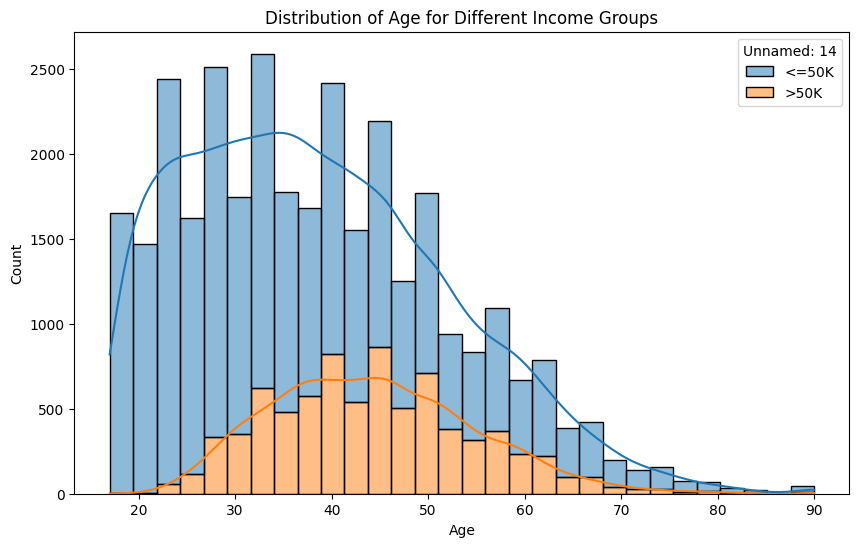

In [9]:
# visualization 
plt.figure(figsize=(10, 6))
sns.histplot(data, x='age', hue='Unnamed: 14', multiple='stack', bins=30, kde=True)
plt.title('Distribution of Age for Different Income Groups')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [10]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1:]

In [11]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
#logistic_model
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(x_train, y_train)
logistic_pred = logistic_model.predict(x_test)
logistic_pred

C:\Users\mahes\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mahes\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array(['<=50K', '<=50K', '<=50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype=object)

In [13]:
#Decision tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(x_train, y_train)
dec_pred = decision_tree_model.predict(x_test)
dec_pred

array(['>50K', '<=50K', '>50K', ..., '<=50K', '<=50K', '>50K'],
      dtype=object)

In [14]:
#Random forest model
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(x_train, y_train)
ran_pred = random_forest_model.predict(x_test)
ran_pred

C:\Users\mahes\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


array(['<=50K', '<=50K', '<=50K', ..., '<=50K', '<=50K', '>50K'],
      dtype=object)

In [15]:
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, logistic_pred))
print("Classification Report:\n", classification_report(y_test, logistic_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, logistic_pred))

Logistic Regression:
Accuracy: 0.7896435156730178
Classification Report:
               precision    recall  f1-score   support

       <=50K       0.81      0.94      0.87      4905
        >50K       0.65      0.32      0.43      1603

    accuracy                           0.79      6508
   macro avg       0.73      0.63      0.65      6508
weighted avg       0.77      0.79      0.76      6508

Confusion Matrix:
 [[4633  272]
 [1097  506]]


In [16]:
print("\nDecision Tree:")
print("Accuracy:", accuracy_score(y_test, dec_pred))
print("Classification Report:\n", classification_report(y_test, dec_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, dec_pred))


Decision Tree:
Accuracy: 0.8083896742470805
Classification Report:
               precision    recall  f1-score   support

       <=50K       0.87      0.87      0.87      4905
        >50K       0.61      0.62      0.61      1603

    accuracy                           0.81      6508
   macro avg       0.74      0.74      0.74      6508
weighted avg       0.81      0.81      0.81      6508

Confusion Matrix:
 [[4270  635]
 [ 612  991]]


In [17]:
print("\nRandom Forest:")
print("Accuracy:", accuracy_score(y_test, ran_pred))
print("Classification Report:\n", classification_report(y_test, ran_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, ran_pred))


Random Forest:
Accuracy: 0.858020897357099
Classification Report:
               precision    recall  f1-score   support

       <=50K       0.89      0.93      0.91      4905
        >50K       0.75      0.63      0.69      1603

    accuracy                           0.86      6508
   macro avg       0.82      0.78      0.80      6508
weighted avg       0.85      0.86      0.85      6508

Confusion Matrix:
 [[4567  338]
 [ 586 1017]]


In [18]:
# Evaluate models and get accuracy scores
logistic_accuracy = accuracy_score(y_test, logistic_pred)
decision_tree_accuracy = accuracy_score(y_test, dec_pred)
random_forest_accuracy = accuracy_score(y_test, ran_pred)

# Display accuracy scores
print("Logistic Regression Accuracy:", logistic_accuracy)
print("Decision Tree Accuracy:", decision_tree_accuracy)
print("Random Forest Accuracy:", random_forest_accuracy)

# Choose the best model based on accuracy
best_model = max([
    ('Logistic Regression', logistic_accuracy),
    ('Decision Tree', decision_tree_accuracy),
    ('Random Forest', random_forest_accuracy)
], key=lambda x: x[1])

print("\nBest Model:")
print(f"Classifier: {best_model[0]}")
print(f"Accuracy: {best_model[1]:.4f}")


Logistic Regression Accuracy: 0.7896435156730178
Decision Tree Accuracy: 0.8083896742470805
Random Forest Accuracy: 0.858020897357099

Best Model:
Classifier: Random Forest
Accuracy: 0.8580
